In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

%matplotlib inline

<h1>Binomijakauma</h1>

Oletetaan onnenpyörä, jota pyöräyttämällä voittaa 15 % todennäköisyydellä. Useampaan onnenpyörän pyöräytykseen voidaan liittää todennäköisyysjakauma käyttäen voittojen lukumäärää satunnaismuuttujana. Esimerkiksi viidelle pyöräytykselle saadaan jakaumaksi:

In [2]:
n = 5 #toistojen määrä
p = 0.15 #onnistumisen todennäköisyys
r_values = list(range(n + 1)) #mahdolliset onnistumisten määrät
  
dist = [binom.pmf(r, n, p) for r in r_values] 
 
onnenpyora = pd.DataFrame({'Todennäköisyys': dist})
onnenpyora.index.name = 'Voittoja'
onnenpyora

,Todennäköisyys
Voittoja,
0,0.443705
1,0.391505
2,0.138178
3,0.024384
4,0.002152
5,0.000076


Jakauman todennäköisyyksien laskeminen perustuu binomijakaumaan. Binomijakaumaa voidaan soveltaa, jos satunnaisilmiö ja satunnaismuuttuja toteuttavat seuraavat ehdot:
<ul>
    <li>Satunnaisilmiötä toistetaan useita kertoja (toistojen määrää merkitään n)</li>
<li>Satunnaismuuttujan arvot voidaan jakaa täsmälleen kahteen luokkaan, joiden todennäköisyydet tiedetään. Jos toisen todennäköisyyttä merkitään p, niin toisen todennäköisyys on 1 - p</li>
    <li>Satunnaismuuttujan arvojen todennäköisyydet pysyvät vakioina toistokerrasta toiseen.</li>
</ul>    
Edellä tarkasteltu onnenpyörä toteuttaa mainitut ehdot:
<ul>
    <li>Satunnaisilmiötä toistetaan 5 kertaa</li>
    <li>Satunnaismuuttujalla on kaksi arvoa: voitto, ei voittoa</li>
    <li>Voiton todennäköisyys on vakio p = 15 %.</li>
</ul>
<b>binom.pmf</b>-funkitolla (probability mass function) voidaan laskea todennäköisyys sille, että satunnaisilmiötä n kertaa toistettaessa saadaan k kappaletta onnistumisia (jompaa kumpaa satunnaismuuttujan arvoista on tapana kutsua onnistumiseksi). Laskentakaavan löydät esimerkiksi funktion ohjesivulta: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

<b>binom.cdf</b>-funktiolla (cumulative distribution function) saat kätevästi kertymätodennäköisyydet.

Muita esimerkkejä binomijakautuneista satunnaismuuttujista:
<ul>
    <li>klaavojen määrä heitettäessä kolikkoa 10 kertaa</li>
<lI>kuutosten määrä heitettäessä kahta noppaa 24 kertaa</li>
<li>voittojen määrä ostettaessa 6 arpaa arpajaisista, joissa joka kolmas arpa voittaa</li>
<li>punaisten lukumäärä 15 ruletin pyörityksessä</li>
<li>viallisten lukumäärä viiden tuotteen erässä</li>
<li>ydinvoiman kannattajien määrä 1000 henkilön otoksessa</li>
<li>ostavien asiakkaiden määrä sisään saapuneista 100 asiakkaasta.</li>
</ul>

Esimerkki. Joka kolmas arpa voittaa. Katsotaanpa miten käy, kun ostetaan kuusi arpaa. Voittojen lukumäärä noudattaa binomijakaumaa:
<ul>
    <li>arvan osto toistetaan 6 kertaa (n=6)</li>
    <li>arpa voi voittaa tai sitten ei, voiton todennäköisyys p=1/3</li>
<li>Voiton todennäköisyys pysyy vakiona (oletetaan, että arpaerä on niin iso, ettei voittoarvon nostaminen olennaisesti muuta voiton todennäköisyyttä seuraavilla arvoilla).</li>
</ul> 

In [3]:
n = 6 #toistojen määrä
p = 1/3 #onnistumisen todennäköisyys
r_values = list(range(n + 1)) #mahdolliset onnistumisten määrät
  
dist = [binom.pmf(r, n, p) for r in r_values] 
cum = [binom.cdf(r, n, p) for r in r_values] 

jakauma = pd.DataFrame({'Todennäköisyys': dist, 'Kertymä': cum})
jakauma.index.name = 'Voittoja'
jakauma

,Todennäköisyys,Kertymä
Voittoja,,
0,0.087791,0.087791
1,0.263374,0.351166
2,0.329218,0.680384
3,0.219479,0.899863
4,0.082305,0.982167
5,0.016461,0.998628
6,0.001372,1.000000


Edellisen jakauman odotusarvo ja varianssi:

In [4]:
odotusarvo, varianssi = binom.stats(n, p) 

print('odotusarvo: ', str(odotusarvo)) 
print('varianssi: ', str(varianssi))

odotusarvo:  2.0
varianssi:  1.3333333333333335


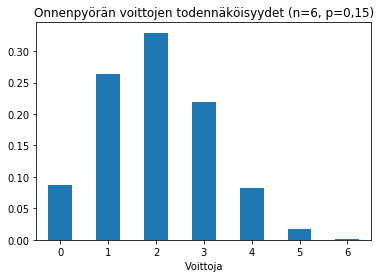

In [5]:
jakauma['Todennäköisyys'].plot.bar(title = 'Onnenpyörän voittojen todennäköisyydet (n=6, p=0,15)', 
                                   rot = 0)

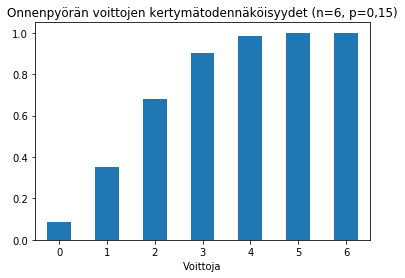

In [6]:
jakauma['Kertymä'].plot.bar(title = 'Onnenpyörän voittojen kertymätodennäköisyydet (n=6, p=0,15)', 
                                   rot = 0)

Esimerkki. Hotellit ja lentoyhtiöt ottavat yleisesti varauksia enemmän kuin paikkoja on tarjolla. Tämä perustuu kokemukseen siitä, että kaikki paikan varanneet eivät kuitenkaan saavu paikalle. No show -tapausten määrä vaihtelee, joten varmuudella ei voida laskea soveliasta ylimääräisten varausten lukumäärää. Todennäköisyysjakaumaa käyttäen voidaan kuitenkin laskea ylimääräisten varausten sovelias lukumäärä, jos esimerkiksi halutaan 90 % varmuus paikkojen riittävyydelle.

Tarkastellaan tilannetta, jossa kapasiteetti on 400 ja tilastojen mukainen no-show todennäköisyys 0,05 (show todennäköisyys 95 %). Lasketaan millä varausmäärällä päästään vielä yli 90 % varmuuteen paikkojen riittävyydestä:

In [7]:
p = 0.95 #varanneen saapumistodennäköisyys
r = 400 #kapasiteetti
n_values = list(range(r, r + 20)) #varausten määrä  

cum = [binom.cdf(r, n, p) for n in n_values] 
pd.DataFrame({'Varauksia': n_values, 'Todennäköisyys riittävyydelle': cum})

,Varauksia,Todennäköisyys riittävyydelle
0,400,1.000000
1,401,1.000000
2,402,1.000000
3,403,1.000000
4,404,0.999998
5,405,0.999990
6,406,0.999958
7,407,0.999849
8,408,0.999531
9,409,0.998720


Taulukosta voidaan lukea, että varausmäärällä 415 saavutetaan noin 92,6 % todennäköisyys paikkojen riittämiselle, mutta varausmäärällä 416 todennäköisyys on jo pienempi kuin 90 %.